# 지도학습 분류 미리보기

In [1]:
# pip insstall scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
##### 한글폰트 쓰려면
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\Windows\Fonts\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

<>:5: SyntaxWarning: invalid escape sequence '\W'
<>:5: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Playdata\AppData\Local\Temp\ipykernel_3444\22807469.py:5: SyntaxWarning: invalid escape sequence '\W'
  font_path = 'C:\Windows\Fonts\gulim.ttc'


### 생선 이진분류 - 도미(bream) or 빙어(smelt)
- 이진분류 0, 1로 구분
- 도미 (1)

In [4]:
# 도미
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [5]:
# 빙어
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

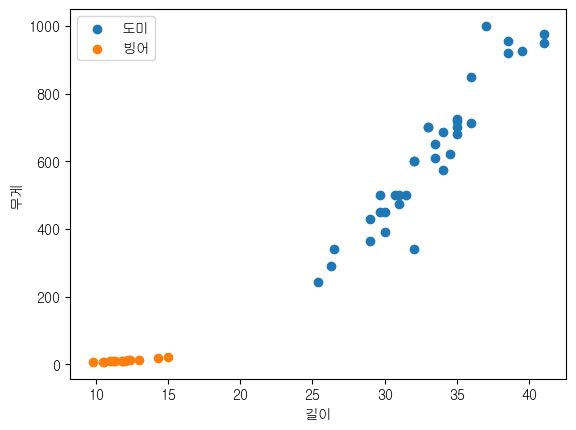

In [6]:
plt.scatter(bream_length, bream_weight, label='도미')
plt.scatter(smelt_length, smelt_weight, label='빙어')
plt.xlabel('길이')
plt.ylabel('무게')
plt.legend()
plt.show()

##### 데이터 전처리
- 모델이 원하는 형태로 데이터 가공
    - 입력(특성): [길이, 무게] 2차원 배열
    - 결과(정답): 도미 or 빙어 -> 1, 0으로 구성된 1차원 배열
    

In [7]:
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight
len(fish_length), len(fish_weight)

(49, 49)

In [8]:
train_input = []
for l, w in zip(fish_length, fish_weight):
    train_input.append([l, w])

# 훈련정답 데이터
train_label = [1] * len(bream_length) + [0] * len(smelt_length)
train_label

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

##### K-최근접 이웃 분류 모델

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
kn = KNeighborsClassifier()

# fit(학습) -> score(평가) -> predict(예측)
kn.fit(train_input, train_label) # 입력데이터, 정답데이트
kn.score(train_input, train_label)
kn.predict([[30, 500], [10, 5]])

array([1, 0])

In [11]:
# 최근접 이웃 모델의 작동 원리
# - 주어진 데이터가 가장 가까운 K개의 이웃을 찾고, 이웃 데이터를 이용해 예측
# - 따라서 최근접 이웃 모델의 훈련은 별도의 연산없이 모델이 데이터를 로드하면 끝냄

# - distance: 모델 데이터포인트와의 거리 (유클리드거리측정)
# - index: 모델 데이터포인터의 인덱스

# 기본 5개: 가장 가까운 것과 index를 반환
distance, index = kn.kneighbors([[10, 5]])
print(distance, index)

print(np.array(train_input)[index])
print(np.array(train_label)[index])

[[1.71172428 2.0880613  2.54950976 3.92173431 4.80520551]] [[35 37 36 40 38]]
[[[ 9.8  6.7]
  [10.6  7. ]
  [10.5  7.5]
  [11.3  8.7]
  [11.   9.7]]]
[[0 0 0 0 0]]


[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
----
[[35 37 36 40 38]]


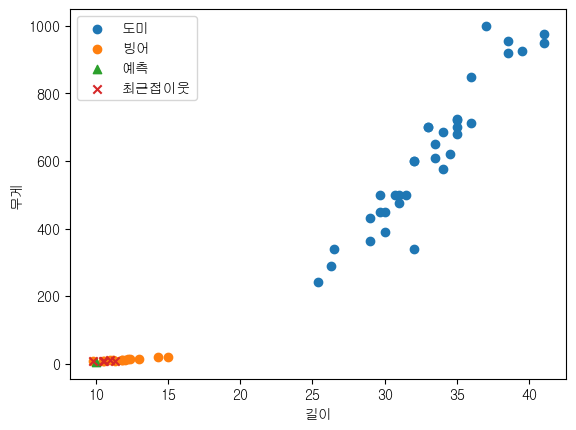

In [12]:
train_input = np.array(train_input)
print(train_input)
print('----')
print(index)
plt.scatter(bream_length, bream_weight, label='도미')
plt.scatter(smelt_length, smelt_weight, label='빙어')
plt.scatter(10, 5, label='예측', marker='^')
plt.scatter(train_input[index, 0], train_input[index, 1], label='최근접이웃', marker='x')

plt.xlabel('길이')
plt.ylabel('무게')
plt.legend()
plt.show()

##### 너무 많은 이웃을 주면 성능 떨어짐
- 현재 데이터가 49개인데 k개수가 49개이니 더 적은 빙어도 도미가 됨.

In [13]:
# k 개수 변경
kn49 = KNeighborsClassifier(n_neighbors=49)

# 학습
kn49.fit(train_input, train_label)

# 평가
kn49.score(train_input, train_label)

0.7142857142857143

##### 훈련데이터와 테스트(평가)데이터 분리

In [14]:
fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight
fish_input = []

for l, w in zip(fish_length, fish_weight):
    fish_input.append([l, w])

# 훈련정답 데이터
fish_label = [1] * len(bream_length) + [0] * len(smelt_length)


In [15]:
train_input = fish_input[:30]
train_label = fish_label[:30]

test_input = fish_input[30:]
test_label = fish_label[30:]

kn = KNeighborsClassifier()
kn.fit(train_input, train_label)
kn.score(test_input, test_label)

0.2631578947368421

In [16]:
from sklearn.model_selection import train_test_split

# test_size 또는 train_size 하나만 설정
train_input, test_input, train_label, test_label = train_test_split(fish_input, fish_label, test_size=0.1)

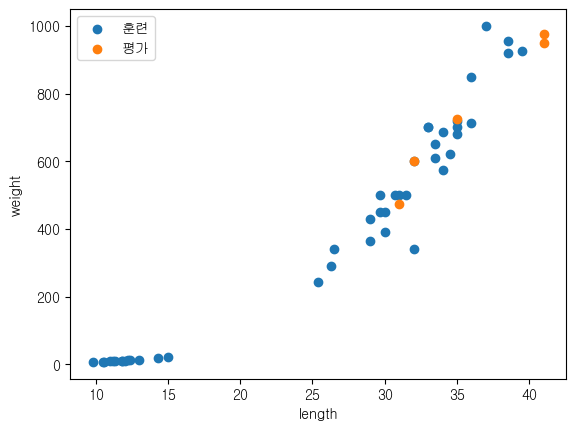

In [17]:
train_input = np.array(train_input)
train_label = np.array(train_label)
test_input = np.array(test_input)
test_label = np.array(test_label)

# 데이터 분포확인
plt.scatter(train_input[:, 0], train_input[:, 1], label='훈련')
plt.scatter(test_input[:, 0], test_input[:, 1], label='평가')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [18]:
kn.fit(train_input, train_label)
kn.score(test_input, test_label)

1.0

##### 정규화
- 데이터포인트의 값의 범위를 재정의하는 것
    - StandardScaler
    - MinMaxScaler

In [19]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_label)
kn.score(test_input, test_label)

predict_input = [25, 150]
kn.predict([predict_input])

array([0])

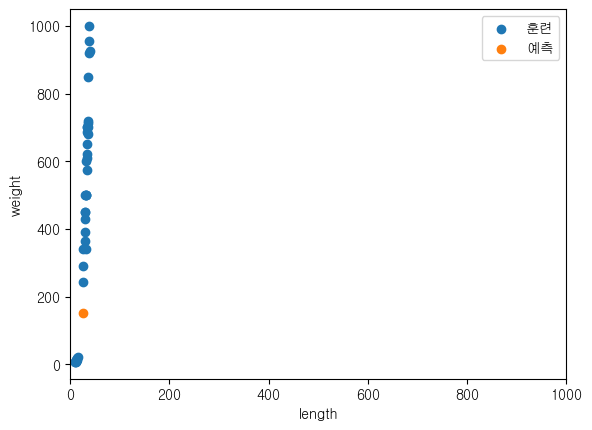

In [20]:
# 데이터 분포확인
plt.scatter(train_input[:, 0], train_input[:, 1], label='훈련')
plt.scatter(predict_input[0], predict_input[1], label='예측')
plt.xlabel('length')
plt.ylabel('weight')

plt.xlim((0, 1000))
plt.legend()
plt.show()

In [21]:
# predict_input과 가까운 데이터포인트 5개 중 1개가 도미, 4개가 빙어임

distance, index = kn.kneighbors([predict_input]) # [25, 150]
np.array(train_label)[index]

array([[1, 0, 0, 0, 0]])

##### 표준 점수 (Z-Score)
- 평균에서 얼마나 떨어져 있는지를 표준편차 단위로 계산한 값
$$
    표준 점수 = \frac{데이터포인트 - 평균}{표준편차}
$$

In [22]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
mean, std

(array([ 26.03863636, 410.35227273]), array([ 10.11120476, 318.96440703]))

In [ ]:
test_scaled = (test_input - mean) / std
kn.fit(test_scaled, test_label)
kn.score(test_input, test_label)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [25]:
predict_scaled = (predict_input - mean) / std
predict_scaled

array([-0.10272133, -0.8162424 ])

In [26]:
kn.predict([predict_input])

array([1])

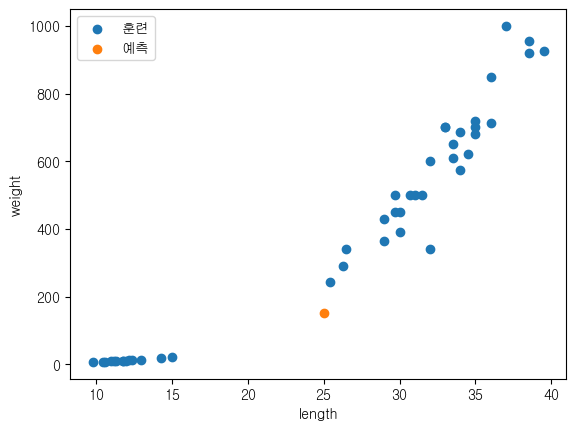

In [28]:
# 데이터 분포확인
plt.scatter(train_input[:, 0], train_input[:, 1], label='훈련')
plt.scatter(predict_input[0], predict_input[1], label='예측')
plt.xlabel('length')
plt.ylabel('weight')

plt.legend()
plt.show()

In [30]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
train_scaled = std_scaler.fit_transform(train_input)
train_scaled

array([[-1.52688396, -1.26456828],
       [-1.40820374, -1.25516285],
       [ 0.68848014,  0.90808793],
       [ 0.36210953,  0.28105872],
       [-1.48732389, -1.25610339],
       [ 0.78738032,  0.51619467],
       [ 1.33133133,  1.61349579],
       [ 0.58957995,  0.59457332],
       [ 0.58957995, -0.22056465],
       [ 0.29287941, -0.14845629],
       [ 0.04562895, -0.22056465],
       [ 0.39177959,  0.12430142],
       [ 0.8862805 ,  0.97079085],
       [ 0.8862805 ,  0.90808793],
       [-1.16095328, -1.22475193],
       [ 0.54012986,  0.28105872],
       [ 0.68848014,  0.90808793],
       [-1.3884237 , -1.25578987],
       [-1.53677398, -1.26300071],
       [-1.28952352, -1.24826552],
       [ 0.78738032,  0.86106074],
       [-1.40820374, -1.25547636],
       [ 0.02584891, -0.37732195],
       [-1.60600411, -1.26550883],
       [ 0.8862805 ,  0.84538501],
       [ 0.39177959, -0.06380735],
       [ 0.73793023,  0.75133062],
       [ 0.73793023,  0.62592478],
       [-1.36864367,

##### 이진분류 정리

##### 머신러닝 파이프라인에 따라 위에서 해본 이진분류를 하나의 코드 셀에 정리해 봅시다!

---

In [34]:
import os
print(os.getcwd())  # 현재 작업 디렉터리

c:\SKN_19\03_machine_learning\01_overview


In [35]:
### 생선 다중분류
df = pd.read_csv('../../01_python_basic/data/fish.csv')

In [36]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [37]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [38]:
df.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
# weight가 0인 이상치 row 삭제
df[df['Weight'] == 0]
df.drop(40).reset_index(drop=True)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
153,Smelt,12.2,12.2,13.4,2.0904,1.3936
154,Smelt,13.4,12.4,13.5,2.4300,1.2690
155,Smelt,12.2,13.0,13.8,2.2770,1.2558
156,Smelt,19.7,14.3,15.2,2.8728,2.0672


##### 데이터 전처리
- 훈련 데이터의 규격: input + label


In [ ]:
# 입력과 라벨 데이터 분리 (학습에 용이하게 ndarray로 변환)
fish_input = df[['Weight', "Length", 'Diagonal', 'Height', 'Width']].to_numpy()
# fish_input = df.drop(columns=['Species']).to_numpy()
fish_label = df['Species'].to_numpy()
fish_input.shape, fish_label.shape

((159, 5), (159,))

In [77]:
# 훈련-테스트 데이터 분리
train_input, test_input, train_label, test_label = train_test_split(fish_input, fish_label, test_size=0.10, random_state=42)
train_input.shape, test_input.shape, train_label.shape, test_label.shape


((143, 5), (16, 5), (143,), (16,))

In [78]:
# 정규화
# 여기서 fit은 모델 학습을 의미하지 않음. 데이터를 보고 통계치(평균, 표준편차 등)를 계산해 저장함
standard_scaler = StandardScaler()
standard_scaler.fit(train_input) # 훈련 데이터 기준 평균/표준편차 작업
train_scaled = standard_scaler.transform(train_input) # 훈련 데이터 정규화 반영
test_scaled = standard_scaler.transform(test_input)   # 테스트 데이터 정규화 반영

##### 훈련

In [79]:
kn = KNeighborsClassifier(n_neighbors=7)
kn.fit(train_scaled, train_label)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [80]:
# 모델 내부에 저장된 훈련 데이터를 나타내는 속성
kn._fit_X

array([[ 1.73221110e+00,  1.42488534e+00,  1.29644161e+00,
         9.03745596e-01,  2.23136186e+00],
       [-4.93721717e-01, -1.73442577e-01, -2.71569245e-01,
        -4.13304570e-01, -1.60295251e-01],
       [-4.73796487e-01, -4.08490801e-01, -4.89348530e-01,
        -3.83019200e-01, -4.12143086e-01],
       [ 8.78272682e-01,  4.37682804e-01,  6.25681408e-01,
         1.45043287e+00,  5.22505507e-01],
       [-1.08578569e+00, -1.55552613e+00, -1.56953378e+00,
        -1.61359858e+00, -1.87130518e+00],
       [ 6.22091155e-01,  4.84692449e-01,  6.51814922e-01,
         1.63762068e+00,  4.31816358e-01],
       [ 3.08980400e-01,  2.96653870e-01,  4.60169152e-01,
         1.18363087e+00, -2.62954524e-02],
       [ 3.08980400e-01,  2.21438438e-01,  4.42746809e-01,
         1.29687393e+00,  3.27487944e-01],
       [ 1.60412034e+00,  9.54788896e-01,  1.12221818e+00,
         2.23145621e+00,  1.12466710e+00],
       [ 2.01685725e+00,  1.37787570e+00,  1.25288575e+00,
         8.81576705e-01

In [90]:
print(kn.classes_)
kn.predict_proba(test_scaled[5:10])

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.        , 0.        , 0.57142857, 0.        , 0.42857143,
        0.        , 0.        ],
       [0.        , 0.        , 0.57142857, 0.        , 0.42857143,
        0.        , 0.        ],
       [0.        , 0.        , 0.42857143, 0.57142857, 0.        ,
        0.        , 0.        ]])

In [94]:
distances, index = kn.kneighbors(test_scaled[7:8])
print(distances, index)
print(train_label[index])

[[0.17604721 0.21765607 0.23984077 0.24724034 0.2565184  0.26690629
  0.29551794]] [[119   1 131 116  80  85   2]]
[['Roach' 'Perch' 'Perch' 'Roach' 'Perch' 'Roach' 'Perch']]


In [82]:
kn.score(test_scaled, test_label)

0.8125

In [89]:
# 예측
arr = [a == b for a, b in zip(kn.predict(test_scaled[5:10]), test_label[5:10])]
arr

[True, True, False, True, True]